In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',  strides=(2, 2), padding="same", input_shape=(224, 224, 3)),

    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.10),
    layers.Conv2D(64 ,(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.10),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.10),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.07),    
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.07),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.07),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.07),
    layers.Dense(5, activation='softmax')
])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 56, 56, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 54, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 27, 27, 64)       

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 5, mode = 'min', restore_best_weights = True)
cnn.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [ ]:
history = cnn.fit(features_train,labels_train,epochs=40, batch_size = 32 ,shuffle = True,validation_split = 0.25,callbacks=[early_stopping_callback])

Epoch 1/40
5/5 [==============================] - 6s 274ms/step - loss: 1.6125 - accuracy: 0.2595 - val_loss: 1.5659 - val_accuracy: 0.2830
Epoch 2/40
5/5 [==============================] - 0s 60ms/step - loss: 1.5059 - accuracy: 0.3165 - val_loss: 1.5141 - val_accuracy: 0.2830
Epoch 3/40
5/5 [==============================] - 0s 50ms/step - loss: 1.4743 - accuracy: 0.2848 - val_loss: 1.5344 - val_accuracy: 0.2830
Epoch 4/40
5/5 [==============================] - 0s 59ms/step - loss: 1.5180 - accuracy: 0.3418 - val_loss: 1.4910 - val_accuracy: 0.2830
Epoch 5/40
5/5 [==============================] - 0s 48ms/step - loss: 1.5012 - accuracy: 0.3481 - val_loss: 1.5716 - val_accuracy: 0.2642
Epoch 6/40
5/5 [==============================] - 0s 54ms/step - loss: 1.5181 - accuracy: 0.3418 - val_loss: 1.5086 - val_accuracy: 0.2830
Epoch 7/40
5/5 [==============================] - 0s 50ms/step - loss: 1.4975 - accuracy: 0.2532 - val_loss: 1.5218 - val_accuracy: 0.2830
Epoch 8/40
5/5 [==========

In [ ]:
cnn.evaluate(features_test,labels_test)#bs=4

1/1 [==============================] - 0s 111ms/step - loss: 0.8340 - accuracy: 0.6923


[0.8340326547622681, 0.692307710647583]

In [ ]:
from keras.models import load_model

cnn.save('model61.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('model61.h5')


In [ ]:
model.evaluate(features_test,labels_test)

1/1 [==============================] - 0s 169ms/step - loss: 0.8340 - accuracy: 0.6923


[0.8340326547622681, 0.692307710647583]

In [ ]:
y_pred = cnn.predict(features_test)

1/1 [==============================] - 0s 117ms/step


In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[4, 2, 4, 2, 0]

In [ ]:
labels_test[:5]
y_classes = [np.argmax(element) for element in labels_test]

In [ ]:
y_classes[:3]

[2, 2, 4]

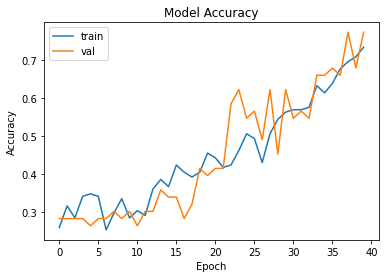

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

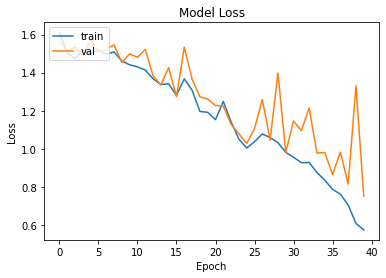

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()